<a href="https://colab.research.google.com/github/gmihaila/machine_learning_toolbox/blob/master/keras_save_load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Save Load model in keras

In [1]:
from IPython.display import clear_output

print("Install pydot")
!apt-get -qq install -y graphviz && pip install -q pydot
clear_output()

print("Downloading data...")
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
clear_output()

!ls

model.json  model_weights.h5  pima-indians-diabetes.data.csv	sample_data
model.png   model.yaml	      pima-indians-diabetes.data.csv.1	whole_model.h5


In [2]:
import numpy as np
import pandas as pd

from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras.utils.vis_utils import plot_model

from IPython.display import Image

Using TensorFlow backend.


In [3]:
# Parse data
path_file = 'pima-indians-diabetes.data.csv'

df = pd.read_csv(path_file, header=None)
data = np.array(df.values, dtype=float)

x = data[:,:8]  # fist 8 columns
y = data[:,8]   # last column

print('x shape: ',x.shape)
print('y shape: ',y.shape)

x shape:  (768, 8)
y shape:  (768,)


In [0]:
# build model

n_input = 8  # number of inputs
n_output = 1 # number of outputs

# build each layer
model_input = Input(shape=(n_input,), name='INPUT')
model_layer1 = Dense(units=8, activation='relu', name='DENSE1')(model_input)
model_output = Dense(units=1, activation='sigmoid', name='OUTPUT')(model_layer1)
# assemble model
model = Model([model_input], model_output)
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

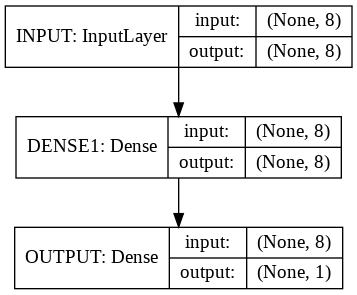

In [5]:
# image model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png')

In [6]:
# fit model
model.fit(x, y, epochs=10, batch_size=10)

Epoch 1/10
768/768 [==============================] - 0s 295us/step - loss: 6.0555 - acc: 0.5768
Epoch 2/10
768/768 [==============================] - 0s 97us/step - loss: 5.8343 - acc: 0.5990
Epoch 3/10
768/768 [==============================] - 0s 95us/step - loss: 5.7260 - acc: 0.6237
Epoch 4/10
768/768 [==============================] - 0s 93us/step - loss: 5.7296 - acc: 0.6250
Epoch 5/10
768/768 [==============================] - 0s 100us/step - loss: 5.6708 - acc: 0.6302
Epoch 6/10
768/768 [==============================] - 0s 100us/step - loss: 5.6364 - acc: 0.6224
Epoch 7/10
768/768 [==============================] - 0s 94us/step - loss: 5.6071 - acc: 0.6237
Epoch 8/10
768/768 [==============================] - 0s 99us/step - loss: 5.4702 - acc: 0.6341
Epoch 9/10
768/768 [==============================] - 0s 90us/step - loss: 5.4395 - acc: 0.6354
Epoch 10/10
768/768 [==============================] - 0s 98us/step - loss: 5.4271 - acc: 0.6250


In [7]:
# evaluate the model
scores = model.evaluate(x, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 51us/step

acc: 62.37%


## Save - Load whole model (weights+architecture)

In [8]:
model.save("whole_model.h5")

model_1 = load_model("whole_model.h5")

print(model_1.summary())

# evaluate the model
scores = model_1.evaluate(x, y)
print("\n%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           (None, 8)                 0         
_________________________________________________________________
DENSE1 (Dense)               (None, 8)                 72        
_________________________________________________________________
OUTPUT (Dense)               (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None
768/768 [==============================] - 0s 66us/step

acc: 62.37%


## Save - Load weights and architecture [JSON format]

In [0]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_weights.h5")

In [10]:
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()
    
model_2 = model_from_json(loaded_model_json)

# compile model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# load weights into new model
model_2.load_weights("model_weights.h5")



print(model_2.summary())

# evaluate the model
scores = model_2.evaluate(x, y)
print("\n%s: %.2f%%" % (model_2.metrics_names[1], scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           (None, 8)                 0         
_________________________________________________________________
DENSE1 (Dense)               (None, 8)                 72        
_________________________________________________________________
OUTPUT (Dense)               (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None
768/768 [==============================] - 0s 70us/step

acc: 62.37%


## Save - Load weights and architecture [YAML format]

In [0]:
from keras.models import model_from_yaml

# serialize model to YAML
model_yaml = model.to_yaml()

with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    
# serialize weights to HDF5
model.save_weights("model_weights.h5")

In [12]:
# load YAML and create model
yaml_file = open('model.yaml', 'r')

with open("model.yaml", "r") as yaml_file:
    loaded_model_yaml = yaml_file.read()

model_3 = model_from_yaml(loaded_model_yaml)

# compile model
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# load weights into new model
model_3.load_weights("model_weights.h5")

print(model_3.summary())

# evaluate the model
scores = model_3.evaluate(x, y)
print("\n%s: %.2f%%" % (model_3.metrics_names[1], scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           (None, 8)                 0         
_________________________________________________________________
DENSE1 (Dense)               (None, 8)                 72        
_________________________________________________________________
OUTPUT (Dense)               (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None
768/768 [==============================] - 0s 75us/step

acc: 62.37%
